In [36]:
# import dataset
import pandas as pd

# “Top 5 Gen AI use-cases” summing to 100 units
# Stack Overflow 2024 AI tool benefits (multi-select, needs normalization)
raw_percentages = {
    'Increase productivity': 81.0,
    'Speed up learning': 62.4,
    'Greater efficiency': 58.5,
    'Improve accuracy in coding': 30.3,
    'Make workload more manageable': 25.0,
    'Improve collaboration': 7.8
}

# Combine 'Increase productivity' and 'Greater efficiency' into one category
merged_key = 'Productivity & Efficiency'
combined_value = raw_percentages['Increase productivity'] + raw_percentages['Greater efficiency']+raw_percentages['Make workload more manageable']

# Reconstruct raw_percentages with the merged category
raw_percentages_combined = {
    merged_key: combined_value,
    'Speed up learning': raw_percentages['Speed up learning'],
    'Improve accuracy in coding': raw_percentages['Improve accuracy in coding'],
    'Improve collaboration': raw_percentages['Improve collaboration']
}

This section of the code focuses on normalizing the combined percentage data and preparing it for creating a waffle chart. A waffle chart is a visualization that uses squares to represent parts of a whole, similar to a pie chart but often easier to read for comparing proportions.

In [37]:
# Normalize again
total_combined = sum(raw_percentages_combined.values())
normalized_combined = {k: round(v / total_combined * 100) for k, v in raw_percentages_combined.items()}

# Fix rounding error to make sum = 100
diff = 100 - sum(normalized_combined.values())
if diff != 0:
    top_key = max(normalized_combined, key=normalized_combined.get)
    normalized_combined[top_key] += diff

# Prepare the waffle data
df_counts_combined = pd.DataFrame({
    'use_case': list(normalized_combined.keys()),
    'count': list(normalized_combined.values())
})

df_waffle_combined = pd.DataFrame({
    'use_case': np.repeat(df_counts_combined['use_case'], df_counts_combined['count'])
})
df_waffle_combined['unit_id'] = np.arange(100)
df_waffle_combined['col'] = df_waffle_combined['unit_id'] % 10
df_waffle_combined['row'] = 9 - (df_waffle_combined['unit_id'] // 10)

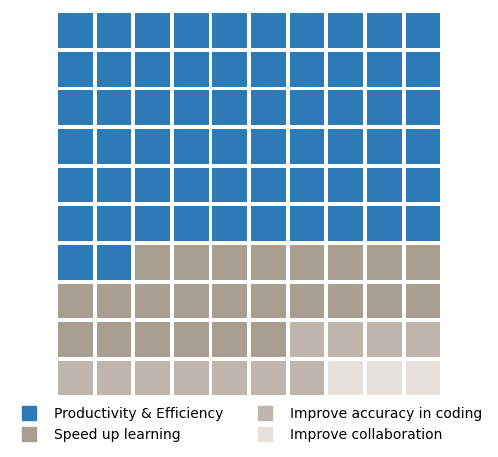

In [38]:
#map each use case to a color
# McKinsey-style colors
# Updated color map
color_map_combined = {
    'Productivity & Efficiency': '#2C7BB6',
    'Speed up learning': '#A89F91',
    'Improve accuracy in coding': '#BEB6AD',
    'Improve collaboration': '#E6E1DC'
    #'#D9D9D9'
}
df_waffle_combined['color'] = df_waffle_combined['use_case'].map(color_map_combined)


# Draw as individual squares (non-overlapping)
fig, ax = plt.subplots(figsize=(6, 6))
for _, row in df_waffle_combined.iterrows():
    rect = plt.Rectangle((row['col'], row['row']), 0.9, 0.9, facecolor=row['color'])
    ax.add_patch(rect)

# Grid settings
ax.set_xlim(-0.1, 10)
ax.set_ylim(-0.1, 10)
ax.set_aspect('equal')
ax.axis('off')

# Legend
handles = [Line2D([0],[0], marker='s', color=color_map_combined[uc], linestyle='', markersize=10)
           for uc in df_counts_combined['use_case']]
ax.legend(handles, df_counts_combined['use_case'],
          loc='lower center', bbox_to_anchor=(0.5, -0.14),
          ncol=2, frameon=False, fontsize=10)

plt.subplots_adjust(top=0.80, bottom=0.15)
plt.show()

